## Following Algorithms have been applied on clean data 
    1. Bayes Ridge Regression
    2. LASSO
    3. XGBoost
    4. LGBoost*
    
*cross validate on LGBoost find hyper parameters and see how it performs 

In [1]:
import pandas as pd
from sklearn.linear_model import BayesianRidge, LinearRegression

In [4]:
# Loading data
train = pd.read_csv('./processeddata/traindata_no_text_processing.csv')

In [5]:
%%time
x = train.iloc[:,0:train.shape[1]-1]
y = train.iloc[:,-1]

CPU times: user 138 ms, sys: 343 ms, total: 481 ms
Wall time: 492 ms


In [7]:
# Listing all available features
x.columns

Index([u'item_id', u'category_name', u'city', u'image_top_1',
       u'item_seq_number', u'param_1', u'param_2', u'param_3',
       u'parent_category_name', u'price', u'region', u'title', u'user_id',
       u'user_type', u'Weekday', u'Weekend_no', u'day', u'image_status',
       u'no_of_words_description', u'no_of_words_title', u'no_of_chars_title',
       u'no_of_chars_description'],
      dtype='object')

In [8]:
# Removing non contributing features
x.drop('title',axis = 1, inplace= True)
x.drop('item_id',axis = 1, inplace= True)

In [10]:
x.columns

Index([u'category_name', u'city', u'image_top_1', u'item_seq_number',
       u'param_1', u'param_2', u'param_3', u'parent_category_name', u'price',
       u'region', u'user_id', u'user_type', u'Weekday', u'Weekend_no', u'day',
       u'image_status', u'no_of_words_description', u'no_of_words_title',
       u'no_of_chars_title', u'no_of_chars_description'],
      dtype='object')

In [11]:
x.head()

,category_name,city,image_top_1,item_seq_number,param_1,param_2,param_3,parent_category_name,price,region,user_id,user_type,Weekday,Weekend_no,day,image_status,no_of_words_description,no_of_words_title,no_of_chars_title,no_of_chars_description
0,42,462,12,2,249,112,1217,4,400.0,19,884270,1,1,13,28,1,7,3,38,108
1,22,1314,2722,19,122,112,1217,2,3000.0,17,227908,1,6,12,26,1,7,3,32,73
2,2,1290,2259,9,84,112,1217,0,4000.0,16,576261,1,0,12,20,1,17,2,14,168
3,42,950,2837,286,38,112,1217,4,2200.0,21,755087,0,5,12,25,1,3,1,20,38
4,0,318,1407,3,278,124,46,6,40000.0,4,944363,1,3,11,16,1,4,3,17,44


Splitting the data into train and test split 

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 1. Bayes Ridge Regression

In [13]:
%%time
clf = BayesianRidge(compute_score=True)
clf.fit(X_train, y_train)

CPU times: user 3.25 s, sys: 1.48 s, total: 4.73 s
Wall time: 7.03 s


In [14]:
clf.coef_

array([  3.44076526e-04,  -1.89848023e-07,  -2.58808356e-05,
        -2.17726915e-06,   1.75211295e-04,   7.25144336e-05,
         5.82415228e-05,   3.07750652e-03,  -6.23441530e-12,
        -1.09277691e-04,  -9.83300802e-10,   2.71867268e-03,
         5.33287323e-03,   2.98623931e-02,  -4.39519236e-03,
        -5.83161999e-02,  -6.05424877e-04,   5.49691503e-04,
        -4.03435392e-04,   3.47394351e-05])

In [15]:
%%time
predcited = clf.predict(X_test)

CPU times: user 40.6 ms, sys: 84.1 ms, total: 125 ms
Wall time: 117 ms


In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
mean_squared_error(y_test, predcited)

0.064646656104280331

In [18]:
test = pd.read_csv('./processeddata/testdata_no_text_processing.csv')

In [19]:
test.drop('title',axis = 1, inplace= True)
test.drop('item_id',axis = 1, inplace= True)

In [20]:
test.columns

Index([u'category_name', u'city', u'image_top_1', u'item_seq_number',
       u'param_1', u'param_2', u'param_3', u'parent_category_name', u'price',
       u'region', u'user_id', u'user_type', u'Weekday', u'Weekend_no', u'day',
       u'image_status', u'no_of_words_description', u'no_of_words_title',
       u'no_of_chars_title', u'no_of_chars_description'],
      dtype='object')

In [22]:
test.head()

,category_name,city,image_top_1,item_seq_number,param_1,param_2,param_3,parent_category_name,price,region,user_id,user_type,Weekday,Weekend_no,day,image_status,no_of_words_description,no_of_words_title,no_of_chars_title,no_of_chars_description
0,10,318,1137,66,110,198,74,4,0.0,4,867817,1,1,16,18,1,2,2,29,23
1,5,993,3063,4,119,112,1217,8,3000.0,19,181851,1,6,15,16,0,10,2,31,154
2,2,151,2178,15,318,112,1217,0,15000.0,12,45341,1,0,16,17,1,21,1,3,233
3,4,1319,3063,70,108,131,1217,2,4500.0,18,375979,1,0,16,17,0,12,3,24,155
4,42,243,6,15,102,112,1217,4,4900.0,14,141497,1,5,15,15,1,10,2,32,106


In [23]:
%%time
predcited_test = clf.predict(test)

CPU times: user 64.4 ms, sys: 132 ms, total: 197 ms
Wall time: 182 ms


In [24]:
predcited_test.shape

(508438,)

In [32]:
testdata = pd.read_csv('test.csv', index_col = "item_id", parse_dates = ["activation_date"])
testdatai = testdata.index

In [33]:
NBop = pd.DataFrame(predcited_test,columns=["deal_probability"],index=testdatai)



In [34]:
NBop["deal_probability"] = NBop["deal_probability"].clip(0.0, 1.0 ) # Between 0 and 1



In [35]:
print all(i > 1.0 for i in NBop.values)
print all(i < .0 for i in NBop.values)

False
False


In [36]:
NBop.to_csv("./processeddata/NB_op.csv",index=True,header=True)

In [37]:
NBop.head()

,deal_probability
item_id,
6544e41a8817,0.238557
65b9484d670f,0.323062
8bab230b2ecd,0.298201
8e348601fefc,0.299084
8bd2fe400b89,0.339001


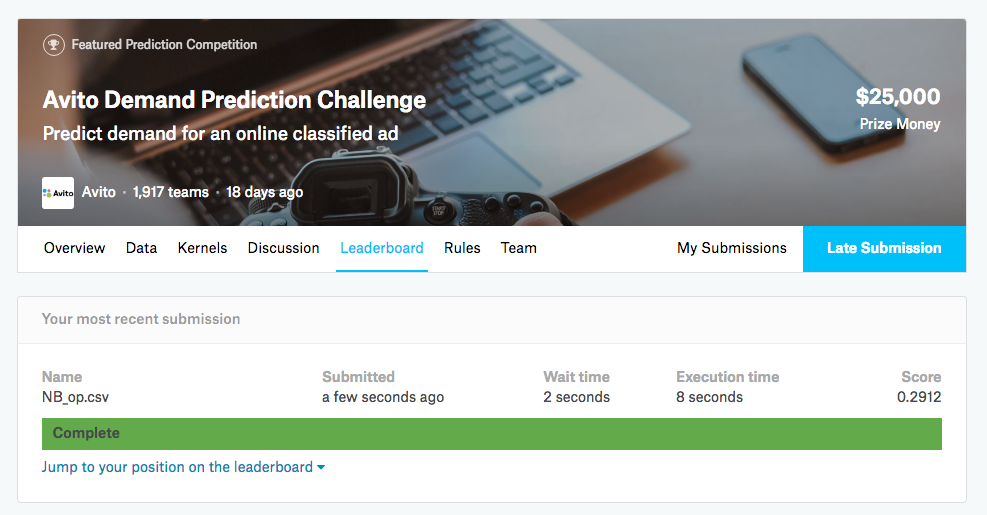

In [139]:
from IPython.display import Image
Image("./processeddata/images/NB1.png")

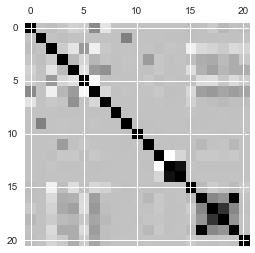

In [42]:
## plotting correlation matrix 
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
plt.matshow(train.corr())

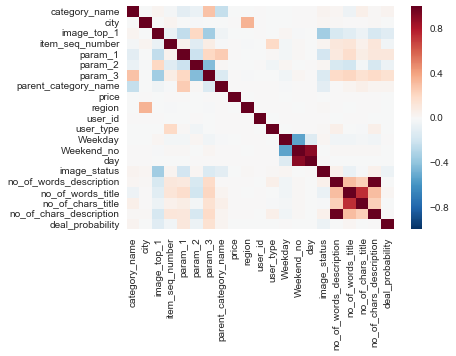

In [43]:
import seaborn as sns
corr = train.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# 2. Lasso (without normalizing) 

In [45]:
from sklearn.linear_model import LassoCV

In [75]:
lasso = LassoCV(cv = 5,normalize=True)

In [76]:
%%time
lassomodel = lasso.fit(X_train, y_train)

CPU times: user 13.5 s, sys: 3.91 s, total: 17.4 s
Wall time: 15.9 s


In [77]:
lassomodel.alpha_

5.5436516538551617e-06

In [78]:
lassomodel.coef_

array([  0.00000000e+00,  -0.00000000e+00,  -1.78666646e-05,
        -1.15317017e-06,   1.48547686e-04,   0.00000000e+00,
         4.75140404e-05,   0.00000000e+00,  -0.00000000e+00,
        -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
         0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
        -3.28162061e-02,  -3.38268391e-05,  -0.00000000e+00,
        -1.36665046e-05,  -0.00000000e+00])

In [79]:
lassomodel.intercept_

0.14024966451290563

In [80]:
lassomodel.alphas_

array([  3.64735261e-05,   3.40153325e-05,   3.17228129e-05,
         2.95848015e-05,   2.75908849e-05,   2.57313516e-05,
         2.39971446e-05,   2.23798174e-05,   2.08714926e-05,
         1.94648239e-05,   1.81529599e-05,   1.69295111e-05,
         1.57885188e-05,   1.47244254e-05,   1.37320484e-05,
         1.28065543e-05,   1.19434354e-05,   1.11384879e-05,
         1.03877911e-05,   9.68768870e-06,   9.03477091e-06,
         8.42585759e-06,   7.85798299e-06,   7.32838123e-06,
         6.83447287e-06,   6.37385227e-06,   5.94427596e-06,
         5.54365165e-06,   5.17002809e-06,   4.82158550e-06,
         4.49662677e-06,   4.19356918e-06,   3.91093665e-06,
         3.64735261e-06,   3.40153325e-06,   3.17228129e-06,
         2.95848015e-06,   2.75908849e-06,   2.57313516e-06,
         2.39971446e-06,   2.23798174e-06,   2.08714926e-06,
         1.94648239e-06,   1.81529599e-06,   1.69295111e-06,
         1.57885188e-06,   1.47244254e-06,   1.37320484e-06,
         1.28065543e-06,

In [81]:
lassomodel.n_iter_

9

In [82]:
%%time
predcited_lasso = lassomodel.predict(X_test)

CPU times: user 39.4 ms, sys: 76.6 ms, total: 116 ms
Wall time: 104 ms


In [83]:
from sklearn.metrics import mean_squared_error

In [84]:
mean_squared_error(y_test, predcited_lasso)

0.064955013934045278

In [85]:
%%time
predcited_test_lasso = lassomodel.predict(test)

CPU times: user 64.7 ms, sys: 123 ms, total: 188 ms
Wall time: 170 ms


In [86]:
predcited_test_lasso.shape

(508438,)

In [87]:
testdata = pd.read_csv('test.csv', index_col = "item_id", parse_dates = ["activation_date"])
testdatai = testdata.index

In [88]:
Lassoop = pd.DataFrame(predcited_test_lasso,columns=["deal_probability"],index=testdatai)



In [89]:
Lassoop["deal_probability"] = Lassoop["deal_probability"].clip(0.0, 1.0 ) # Between 0 and 1



In [90]:
print all(i > 1.0 for i in Lassoop.values)
print all(i < .0 for i in Lassoop.values)

False
False


In [91]:
Lassoop.to_csv("./processeddata/lasso_op.csv",index=True,header=True)

In [92]:
Lassoop.head()

,deal_probability
item_id,
6544e41a8817,0.106435
65b9484d670f,0.160259
8bab230b2ecd,0.172814
8e348601fefc,0.158577
8bd2fe400b89,0.179510


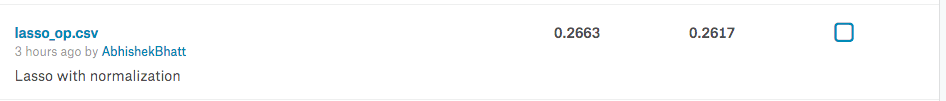

In [136]:
from IPython.display import Image
Image("./processeddata/images/LASSO1.png")

# 3. xgboost 

In [110]:
params = {'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bytree': 1.0,
 'eta': 0.3,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 9,
 'min_child_weight': 6,
 'missing': 9999999999,
 'n_estimators': 9,
 'nthread': 4,
 'objective': 'reg:linear',
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': 1301,
 'silent': 1,
 'subsample': 0.7}

In [111]:
%%time
import xgboost as xgb
xgdmat=xgb.DMatrix(X_train,y_train)
#our_params={'eta':0.1,'seed':0,'subsample':0.8,'colsample_bytree':0.8,'objective':'reg:linear','max_depth':5,'min_child_weight':1}
final_gb=xgb.train(params,xgdmat)




CPU times: user 1min 4s, sys: 1.36 s, total: 1min 5s
Wall time: 1min 5s


In [112]:
%%time
train_mat = xgb.DMatrix(X_train)
y_pred = final_gb.predict(train_mat)
print(y_pred)

[ 0.31811196  0.26457596  0.2828486  ...,  0.3730697   0.33645943
  0.19865409]
CPU times: user 1.54 s, sys: 865 ms, total: 2.41 s
Wall time: 2.57 s


In [113]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_train,y_pred)

0.24102452426760085

##### our_params  score was 0.24589907273997166
##### lambda = 1 alpha = 0 L2 was 0.24102452426760085
##### lambda = 0 alpha = 1 L1 was 0.2411871856978893


### Test result

In [114]:
%%time
true_test = xgb.DMatrix(test)
predcited_test_xgb = final_gb.predict(true_test)


CPU times: user 575 ms, sys: 262 ms, total: 837 ms
Wall time: 3.39 s


In [115]:
predcited_test_xgb.shape

(508438,)

In [87]:
testdata = pd.read_csv('test.csv', index_col = "item_id", parse_dates = ["activation_date"])
testdatai = testdata.index

In [116]:
xgboop = pd.DataFrame(predcited_test_xgb,columns=["deal_probability"],index=testdatai)


In [117]:
xgboop["deal_probability"] = xgboop["deal_probability"].clip(0.0, 1.0 ) # Between 0 and 1



In [118]:
print all(i > 1.0 for i in xgboop.values)
print all(i < .0 for i in xgboop.values)

False
False


In [119]:
xgboop.to_csv("./processeddata/xgb_op.csv",index=True,header=True)

In [120]:
xgboop.head()

,deal_probability
item_id,
6544e41a8817,0.230397
65b9484d670f,0.409083
8bab230b2ecd,0.320890
8e348601fefc,0.301996
8bd2fe400b89,0.322020


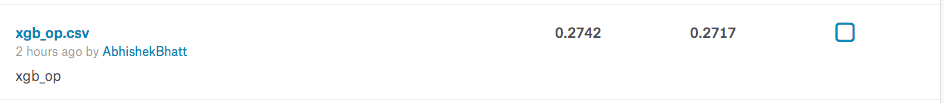

In [137]:
from IPython.display import Image
Image("./processeddata/images/XGB1.png")

# 4. light gradient boost 

In [122]:
import json
import lightgbm as lgb
lgb_train = lgb.Dataset(X_train, y_train)

In [123]:
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [126]:
# specify your configurations as a dict
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l1', 'auc'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

In [127]:
%%time
print('Start training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=50,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

Start training...
[1]	valid_0's l1: 0.18837	valid_0's auc: 0.737983
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.186733	valid_0's auc: 0.740976
[3]	valid_0's l1: 0.185214	valid_0's auc: 0.740157
[4]	valid_0's l1: 0.183824	valid_0's auc: 0.740059
[5]	valid_0's l1: 0.182589	valid_0's auc: 0.73889
[6]	valid_0's l1: 0.181402	valid_0's auc: 0.74075
[7]	valid_0's l1: 0.180376	valid_0's auc: 0.742121
[8]	valid_0's l1: 0.179388	valid_0's auc: 0.742252
[9]	valid_0's l1: 0.178466	valid_0's auc: 0.74253
[10]	valid_0's l1: 0.177609	valid_0's auc: 0.743512
[11]	valid_0's l1: 0.176805	valid_0's auc: 0.743796
[12]	valid_0's l1: 0.176031	valid_0's auc: 0.743889
[13]	valid_0's l1: 0.175298	valid_0's auc: 0.745449
[14]	valid_0's l1: 0.174612	valid_0's auc: 0.746113
[15]	valid_0's l1: 0.173956	valid_0's auc: 0.746405
[16]	valid_0's l1: 0.173333	valid_0's auc: 0.746474
[17]	valid_0's l1: 0.172741	valid_0's auc: 0.746916
[18]	valid_0's l1: 0.172191	valid_0's auc: 0.74624

## lets see how the test works 

In [128]:
%%time
predcited_test_lgb = gbm.predict(test, num_iteration=gbm.best_iteration)


CPU times: user 1.67 s, sys: 301 ms, total: 1.97 s
Wall time: 1.04 s


In [129]:
predcited_test_lgb.shape

(508438,)

In [87]:
testdata = pd.read_csv('test.csv', index_col = "item_id", parse_dates = ["activation_date"])
testdatai = testdata.index

In [130]:
lgboop = pd.DataFrame(predcited_test_lgb,columns=["deal_probability"],index=testdatai)


In [131]:
lgboop["deal_probability"] = lgboop["deal_probability"].clip(0.0, 1.0 ) # Between 0 and 1



In [132]:
print all(i > 1.0 for i in lgboop.values)
print all(i < .0 for i in lgboop.values)

False
False


In [133]:
lgboop.to_csv("./processeddata/lgb_op.csv",index=True,header=True)

In [134]:
lgboop.head()

,deal_probability
item_id,
6544e41a8817,0.095163
65b9484d670f,0.219655
8bab230b2ecd,0.156464
8e348601fefc,0.149415
8bd2fe400b89,0.205707


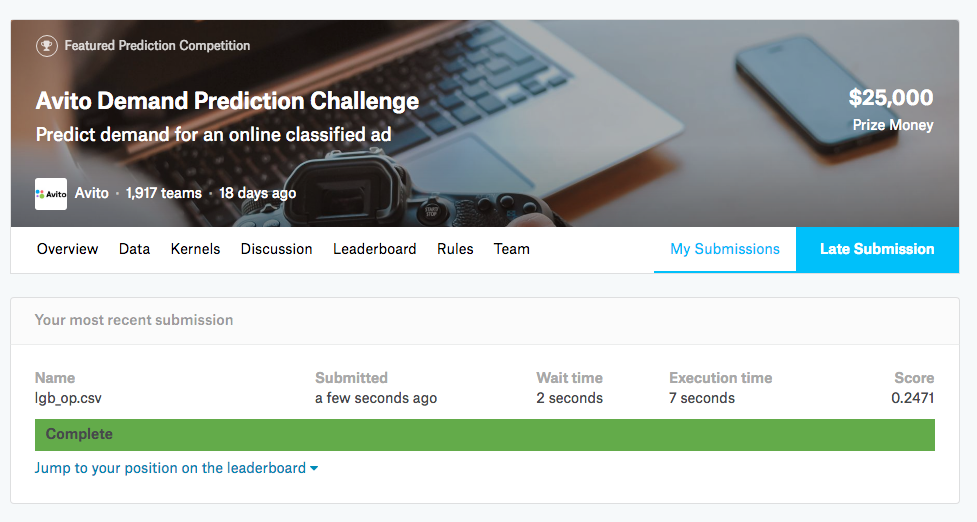

In [138]:
from IPython.display import Image
Image("./processeddata/images/LB1.png")

## cross validate Light Gradient boost to see if better result  
on their github they have parameter tuning techniques 
https://github.com/Microsoft/LightGBM/tree/master/examples/python-guide

###### implementations end here 

In [ ]:
%%time
tesdmat=xgb.DMatrix(X_train)
y_pred=final_gb.predict(tesdmat)
print(y_pred)

In [5]:
import pickle

In [6]:
file = open("./processeddata/perfect_train_5000.pkl",'rb')

In [7]:
%%time
train_pickle = pickle.load(file)

CPU times: user 16.4 s, sys: 10.2 s, total: 26.5 s
Wall time: 52.4 s


In [8]:
file = open("./processeddata/perfect_train_output_5000.pkl",'rb')

In [9]:
%%time
train_pickle_out = pickle.load(file)

CPU times: user 13.6 s, sys: 318 ms, total: 13.9 s
Wall time: 14.7 s


In [ ]:
%%time
file = open("./processeddata/perfect_test_5000.pkl.pkl",'rb')
test_pickle = pickle.load(file)

In [8]:
%%time 
arr = train_pickle.toarray()

CPU times: user 9.12 s, sys: 20.8 s, total: 29.9 s
Wall time: 36.6 s


In [4]:
%%time 
type(arr)

NameError: name 'arr' is not defined

In [17]:
arr_op = train_pickle_out.values
type(arr_op)

numpy.ndarray

In [ ]:
%%time 
from sklearn.linear_model import BayesianRidge, LinearRegression

clf2 = BayesianRidge(compute_score=True)
clf2.fit(arr,arr_op)

In [10]:
import lightgbm as lgb

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_pickle, train_pickle_out, test_size=0.1, random_state=42)

In [14]:
lgb_train = lgb.Dataset(X_train, y_train)


In [15]:
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [16]:
# specify your configurations as a dict
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'auc'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

In [17]:
%%time
print('Start training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

Start training...
[1]	valid_0's l2: 0.0667757	valid_0's auc: 0.735575
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l2: 0.0658539	valid_0's auc: 0.740106
[3]	valid_0's l2: 0.0650652	valid_0's auc: 0.740226
[4]	valid_0's l2: 0.0643057	valid_0's auc: 0.740201
[5]	valid_0's l2: 0.0636027	valid_0's auc: 0.742052
[6]	valid_0's l2: 0.0629556	valid_0's auc: 0.742267
[7]	valid_0's l2: 0.0623557	valid_0's auc: 0.742658
[8]	valid_0's l2: 0.0618112	valid_0's auc: 0.743216
[9]	valid_0's l2: 0.0613265	valid_0's auc: 0.743648
[10]	valid_0's l2: 0.0608631	valid_0's auc: 0.743635
[11]	valid_0's l2: 0.0604681	valid_0's auc: 0.74405
[12]	valid_0's l2: 0.0601012	valid_0's auc: 0.744219
[13]	valid_0's l2: 0.0597282	valid_0's auc: 0.745106
[14]	valid_0's l2: 0.059406	valid_0's auc: 0.744402
[15]	valid_0's l2: 0.0591094	valid_0's auc: 0.744264
[16]	valid_0's l2: 0.0588234	valid_0's auc: 0.745713
[17]	valid_0's l2: 0.0585457	valid_0's auc: 0.745705
[18]	valid_0's l2: 0.0583096	va

In [19]:
print('Save model...')
gbm.save_model('model.txt')

Save model...


In [21]:
from sklearn.metrics import mean_squared_error
print('Start predicting...')
# predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
# eval
print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)

Start predicting...
('The rmse of prediction is:', 0.24058827845523162)


In [ ]:
y_pred_test_pickle = gbm.predict(test_pickle, num_iteration=gbm.best_iteration)
# eval
#print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)